In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
import numpy as np
import optuna
import matplotlib.pyplot as plt

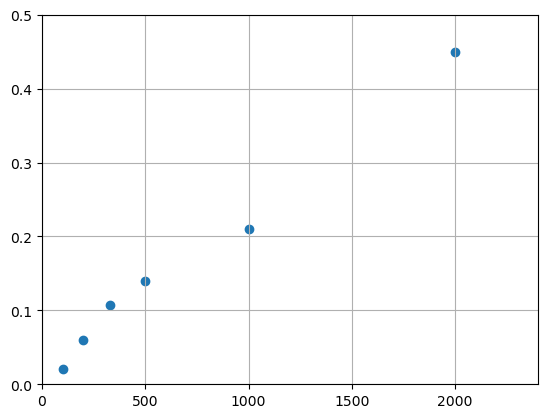

In [28]:
x = np.array(
    [100, 200, 330, 500, 1000, 2000]
)

y = np.array(
    [2, 6, 10.7, 14, 21, 45]
) /100

plt.scatter(x, y)
plt.xlim([0,2400])
plt.ylim([0,0.5])
plt.grid()

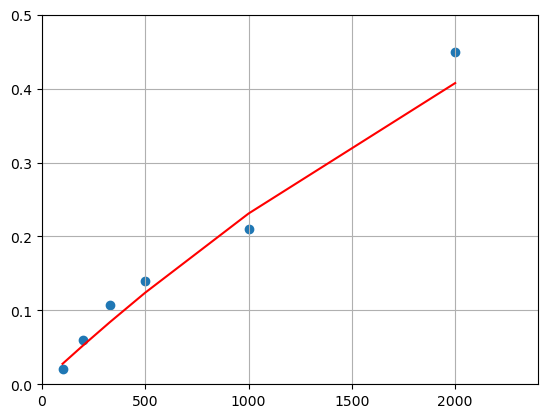

In [31]:
plt.scatter(x, y)

a = 0.00026
b = 0.002

pred = 1 - np.exp(-a*x) + b

plt.plot(x, pred, color="red")
plt.xlim([0,2400])
plt.ylim([0,0.5])
plt.grid()

In [32]:
import optuna


def f(x, a, b):
    return 1 - np.exp(-a * x) + b

def objective(trial):

    a = trial.suggest_uniform('a', 0.0001, 0.0004)
    b = trial.suggest_uniform('b', 0, 0.1)

    return np.sum(np.square((1 - np.exp(-a*x) + b) - y))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2023-07-02 05:23:08,549] A new study created in memory with name: no-name-da0a486a-3dae-478d-a047-59fae428de6a
/tmp/ipykernel_27/800190259.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  a = trial.suggest_uniform('a', 0.0001, 0.0004)
/tmp/ipykernel_27/800190259.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  b = trial.suggest_uniform('b', 0, 0.1)
[I 2023-07-02 05:23:08,559] Trial 0 finished with value: 0.0107549576487012 and parameters: {'a': 0.00023393241101163804, 'b': 0.058316307673838}. Best is trial 0 with value: 0.0107549576487012.
[I 2023-07-02 05:23:08,561] Trial 1 finished with value: 0.006606888587050986 and parameters: {'a': 0.0002774381225391101, 'b': 0.03071747568085661}. Best is 

In [34]:
best_params = study.best_params
best_value = study.best_value

print('Best Params:', best_params)
print('Best Value:', best_value)

Best Params: {'a': 0.0002813446141609706, 'b': 0.0018608159345778078}
Best Value: 0.0021163746380681164


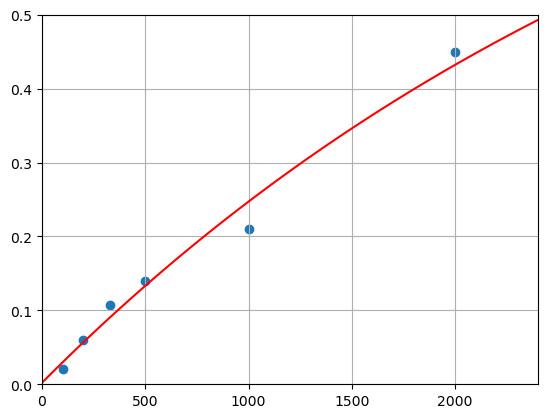

In [38]:
a_ = best_params['a']
b_ = best_params['b']

plt.scatter(x, y)

pred = 1 - np.exp(-a_*np.linspace(0,2500, 100)) + b_

plt.plot(np.linspace(0,2500, 100), pred, color="red")
plt.xlim([0,2400])
plt.ylim([0,0.5])
plt.grid()